# Project 1

The purpose of this notebook to document the data preparation for the DiscGolf evaluation.

## Data Sources
DiscGolf.csv was sourced from https://www.kaggle.com/datasets/lanekatris/pdga-united-states-disc-golf-courses

postcode_level_averages.csv was sourced from https://www.kaggle.com/datasets/hamishgunasekara/average-income-per-zip-code-usa-2018

2010_and_2014_county_population_density.csv County population density information was sourced from https://odn.data.socrata.com/dataset/2010-and-2014-county-population-density/mmzq-86sd

Unemployment.csv containing median household income was sourced from https://www.ers.usda.gov/data-products/county-level-data-sets/

County names were sourced from python module geopy.geocoders

## Data Preparation
### Draft Data (does not contain county info)
DiscGolf.csv and postcode_level_averages.csv data were joined and saved to the team Resources folder as:

    draft_dgolf_avincome.csv

Data summarized from "draft_dgolf_avincome.csv" by state and shared with the team in a jupyter notebook, then saved to the team Resources folder:

    draft_dgolf_statesummary.csv

Region data added to individual disc golf records from "draft_dgolf_avincome.csv" and saved to the DataPrep/Resources folder:

    draft_dgolf_region.csv

Data summarized from "draft_ dgolf_region.csv" by region and saved to the team Resources folder as:

    draft_dgolf_regionsummary.csv

### Data (contains county info, appx 3% data loss due to merge with county datasets)

County data added to individual disc golf records from "draft_dgolf_avincome.csv" from python module geopy.geocoders and saved to the DataPrep/Resources folder as:

    dgolfcounty.csv

    Note:  234 records did not match during the county merge and were not included in the "dgolf_region.csv" and subsequent summary files.

Region data added to individual disc golf course records from "dgolfcounty.csv" and saved to the team Resources folder as :

    dgolf_region.csv

Data summarized from "dgolf_region.csv" by area (county&state), state, and region and saved to the team Resources folder as:

    dgolf_summary_area

    dgolf_summary_state

    dgolf_summary_region

### CHROMO Data - dataset rebuilt from original data to reduce data loss during merge.

See Jupyter notebook 'P1_data_prep_Choropleth_final.ipynb' for details



In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib as plt
import requests
import json
from scipy.stats import linregress
import datetime

In [2]:
#read CSV and create Pandas DataFrames
draftdf = pd.DataFrame(pd.read_csv('Resources/draft_dgolf_avincome.csv'))

In [3]:
#check df
draftdf.head(2)

,Unnamed: 0,id,name,city,state_x,zip,holeCount,rating,latitude,longitude,Modified,Comments,state_y,zipcode,total_pop,total_income,country,avg_income
0,0,adventist-discovery-park,Adventist DISCovery Park,Opelika,Alabama,36804,3,NaN,32.645412,-85.378280,no,none,AL,36804,8240,417346,USA,50648.786408
1,1,agape-disc-golf-course,Agape Disc Golf Course,Scottsboro,Alabama,35769,9,NaN,34.622819,-86.080692,no,none,AL,35769,4170,316625,USA,75929.256595


In [4]:
#create summary by state:  of number of courses, total population, average income, course rating  (first attempt)

subdraftdf = draftdf[['state_x','total_pop','avg_income','holeCount','rating']]
subdraftdf.head()
groupdf= subdraftdf.groupby(['state_x'])

ltotpop = [groupdf['total_pop'].sum()]
lavinc = [groupdf['avg_income'].mean()]
lavholes = [groupdf['holeCount'].mean()]
lavrating = [groupdf['rating'].mean()]
ltotcourses = [groupdf['holeCount'].count()]

totpop = pd.DataFrame(ltotpop).transpose()
avinc = pd.DataFrame(lavinc).transpose()
avholes = pd.DataFrame(lavholes).transpose()
avrating = pd.DataFrame(lavrating).transpose()
totcourses = pd.DataFrame(ltotcourses).transpose()


merge12 = pd.merge(totpop,avinc,on='state_x')
merge34 = pd.merge(avholes,avrating,on='state_x')
merge12nmore = pd.merge(merge12,totcourses,on='state_x').rename(columns = {"holeCount":"n_courses"})
merge12nmore
mergeall = pd.merge(merge12nmore,merge34,on='state_x')
mergeall


,total_pop,avg_income,n_courses,holeCount,rating
state_x,,,,,
Alabama,970510,60129.955845,121,15.438017,3.673913
Alaska,288780,74791.929935,31,13.451613,3.692308
Arizona,994820,63961.727080,71,13.887324,3.410256
Arkansas,886250,55399.123422,109,13.981651,3.789474
California,4093380,75793.617001,309,14.239482,3.280000
Colorado,1879100,80219.338127,176,13.886364,3.277778
Connecticut,330080,109678.582339,30,14.933333,3.611111
Delaware,178660,71301.197832,13,16.769231,3.000000
Florida,2229570,71147.145914,178,14.471910,3.603774


In [5]:
#This is the data format that the rest of the team is using for state level analyses
ma2 = mergeall.reset_index()
ma2.head()


,state_x,total_pop,avg_income,n_courses,holeCount,rating
0,Alabama,970510,60129.955845,121,15.438017,3.673913
1,Alaska,288780,74791.929935,31,13.451613,3.692308
2,Arizona,994820,63961.727080,71,13.887324,3.410256
3,Arkansas,886250,55399.123422,109,13.981651,3.789474
4,California,4093380,75793.617001,309,14.239482,3.280000


In [6]:
#comment out so csv outputs aren't inadvertently overwritten
# write data to CSV file 
# ma2.to_csv('Resources/draft_dgolf_statesummary.csv',index = False)

In [7]:
#data exploration sort by n courses
ma2sort = ma2.sort_values('n_courses',ascending= False)
ma2sort.head()

,state_x,total_pop,avg_income,n_courses,holeCount,rating
42,Texas,6156110,73725.588366,464,13.896552,3.398936
48,Wisconsin,2489580,66144.270928,344,12.281977,3.550388
22,Minnesota,2365280,69054.948215,339,11.265487,3.093750
4,California,4093380,75793.617001,309,14.239482,3.280000
21,Michigan,2712540,65157.653139,300,15.246667,3.713043


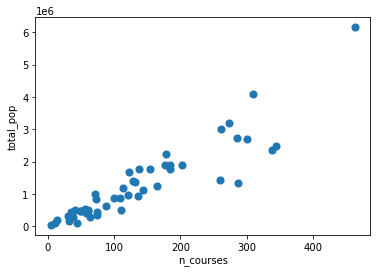

In [8]:
#data exploration
ma2.plot.scatter(x = 'n_courses',y = 'total_pop',s = 50)

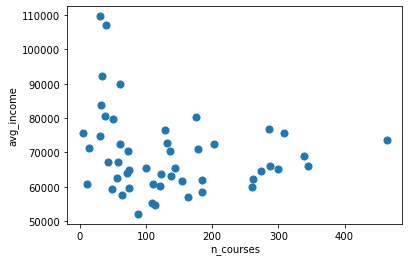

In [9]:
#data exploration
ma2.plot.scatter(x = 'n_courses',y = 'avg_income',s = 50)

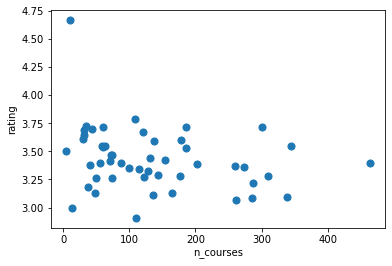

In [10]:
#data exploration
ma2.plot.scatter(x = 'n_courses',y = 'rating',s = 50)

**ADD REGION TO draft DATASET**

starting data: draft_dgolf_avincome.csv

In [11]:
#read original dataframe
dgolfregiondf = pd.read_csv('Resources/draft_dgolf_avincome.csv',index_col = 0)
dgolfregiondf.head(2)

,id,name,city,state_x,zip,holeCount,rating,latitude,longitude,Modified,Comments,state_y,zipcode,total_pop,total_income,country,avg_income
0,adventist-discovery-park,Adventist DISCovery Park,Opelika,Alabama,36804,3,NaN,32.645412,-85.378280,no,none,AL,36804,8240,417346,USA,50648.786408
1,agape-disc-golf-course,Agape Disc Golf Course,Scottsboro,Alabama,35769,9,NaN,34.622819,-86.080692,no,none,AL,35769,4170,316625,USA,75929.256595


In [12]:
# add region column to df
dgolfregiondf['region'] = pd.Series(dtype = 'string')
dgolfregiondf.head(2)

,id,name,city,state_x,zip,holeCount,rating,latitude,longitude,Modified,Comments,state_y,zipcode,total_pop,total_income,country,avg_income,region
0,adventist-discovery-park,Adventist DISCovery Park,Opelika,Alabama,36804,3,NaN,32.645412,-85.378280,no,none,AL,36804,8240,417346,USA,50648.786408,<NA>
1,agape-disc-golf-course,Agape Disc Golf Course,Scottsboro,Alabama,35769,9,NaN,34.622819,-86.080692,no,none,AL,35769,4170,316625,USA,75929.256595,<NA>


In [13]:
# add region to dataframe
northeast = ['ME','VT','NH','MA','CT','RI','NY','PA','NJ']
southeast = ['AR', 'LA', 'MS', 'AL', 'GA', 'SC', 'NC', 'VA', 'WV', 'KY', 'TN', 'FL','DE','MD']
west = ['WA', 'OR', 'CA', 'NV', 'ID', 'MT', 'WY', 'UT', 'CO','AK','HI'] 
midwest = ['ND','SD','NE','KS','MN','IA','MO','WI','IL','MI','OH','IN']
southwest = ['AZ','NM','OK','TX'] 

for index, row in dgolfregiondf.iterrows():
    rowstate = row['state_y']
    if rowstate in northeast:
        dgolfregiondf.loc[index,'region'] = 'northeast'
    elif rowstate in southeast:
        dgolfregiondf.loc[index,'region']= 'southeast'
    elif rowstate in west:
        dgolfregiondf.loc[index,'region'] = 'west'
    elif rowstate in midwest:
        dgolfregiondf.loc[index,'region'] = 'midwest'
    elif rowstate in southwest:
        dgolfregiondf.loc[index,'region'] = 'southwest'

dgolfregiondf.tail(2)

,id,name,city,state_x,zip,holeCount,rating,latitude,longitude,Modified,Comments,state_y,zipcode,total_pop,total_income,country,avg_income,region
6768,veterans-memorial-park-0,Veterans Memorial Park,Clarksburg,West Virginia,26301,9,3.0,39.272521,-80.360143,no,none,WV,26301,12350,627014,USA,50770.364372,southeast
6769,wheeling-island-marina-disc-golf-course,Wheeling Island Marina Disc Golf Course,Wheeling,West Virginia,26003,18,1.0,40.078831,-80.736205,no,none,WV,26003,19330,1327668,USA,68684.324884,southeast


In [14]:
#comment out so csv outputs aren't inadvertently overwritten
#add region info to csv file.
# dgolfregiondf.to_csv('Resources/draft_dgolf_region.csv',index = False)

#Create draft Region Summary

In [15]:
blueberry= pd.DataFrame(pd.read_csv('Resources/draft_dgolf_region.csv'))

In [16]:
#create mean summary for av_income, holeCount and rating columns
draftregiongroupdf= blueberry.groupby(['region']).mean()
draftregiongroupdf.head(10)

,zip,holeCount,rating,latitude,longitude,zipcode,total_pop,total_income,avg_income
region,,,,,,,,,
midwest,55513.963555,12.761250,3.305738,41.988506,-90.745924,55513.963555,7870.524358,548783.219041,65654.105181
northeast,10685.983897,14.861514,3.416107,42.054244,-74.626684,10685.983897,7693.913043,617240.579710,76394.097631
southeast,35770.368715,14.723153,3.454545,34.598949,-83.801955,35770.368715,10663.010552,712068.512725,63356.492395
southwest,77987.502674,13.778075,3.336700,32.775007,-99.145820,77987.502674,11890.508021,880618.754011,68164.100045
west,89131.379655,13.763851,3.344954,41.708002,-117.424117,89131.379655,10682.379655,799496.566757,73987.123983


In [17]:
draftregiongroupdf.columns

Index(['zip', 'holeCount', 'rating', 'latitude', 'longitude', 'zipcode',
       'total_pop', 'total_income', 'avg_income'],
      dtype='object')

In [18]:
draftregiongroupdftrim = draftregiongroupdf[['avg_income','holeCount', 'rating']]
draftregiongroupdftrim

,avg_income,holeCount,rating
region,,,
midwest,65654.105181,12.761250,3.305738
northeast,76394.097631,14.861514,3.416107
southeast,63356.492395,14.723153,3.454545
southwest,68164.100045,13.778075,3.336700
west,73987.123983,13.763851,3.344954


In [19]:
#create count summary for id column to rename as n_courses
draftregiongroupdfcount= blueberry.groupby(['region']).count()
draftregiongroupdfcount.head(10)

,id,name,city,state_x,zip,holeCount,rating,latitude,longitude,Modified,Comments,state_y,zipcode,total_pop,total_income,country,avg_income
region,,,,,,,,,,,,,,,,,
midwest,2689,2689,2689,2689,2689,2689,1063,2689,2689,2689,2689,2689,2689,2689,2689,2689,2689
northeast,621,621,621,621,621,621,298,621,621,621,621,621,621,621,621,621,621
southeast,1611,1611,1611,1611,1611,1611,737,1611,1611,1611,1611,1611,1611,1611,1611,1611,1611
southwest,748,748,748,748,748,748,297,748,748,748,748,748,748,748,748,748,748
west,1101,1101,1101,1101,1101,1101,545,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101


In [49]:
# create table subset and rename column
draftregiongroupdfcounttrim = draftregiongroupdfcount[['id']]
draftregiongroupdfcounttrim = draftregiongroupdfcounttrim.rename(columns = {'id':"n_courses"}).copy()
draftregiongroupdfcounttrim


,n_courses
region,
midwest,2689
northeast,621
southeast,1611
southwest,748
west,1101


In [21]:
#create sum summary for total_pop column
draftregiongroupdfsum= blueberry.groupby(['region']).sum()
draftregiongroupdfsum.head(10)

,zip,holeCount,rating,latitude,longitude,zipcode,total_pop,total_income,avg_income
region,,,,,,,,,
midwest,149277048,34315,3514.0,112907.092959,-244015.789681,149277048,21163840,1475678076,1.765439e+08
northeast,6635996,9229,1018.0,26115.685578,-46343.170500,6635996,4777920,383306400,4.744073e+07
southeast,57626064,23719,2546.0,55738.906444,-135004.948701,57626064,17178110,1147142374,1.020673e+08
southwest,58334652,10306,991.0,24515.705212,-74161.073111,58334652,8894100,658702828,5.098675e+07
west,98133649,15154,1823.0,45920.510310,-129283.953270,98133649,11761300,880245720,8.145982e+07


In [22]:
draftregiongroupdfsumtrim = draftregiongroupdfsum[['total_income']]
draftregiongroupdfsumtrim

,total_income
region,
midwest,1475678076
northeast,383306400
southeast,1147142374
southwest,658702828
west,880245720


In [50]:
draft_dgolf_summary_region1 = pd.merge(draftregiongroupdftrim,draftregiongroupdfcounttrim,left_index = True,right_index=True)
draft_dgolf_summary_region = pd.merge(draft_dgolf_summary_region1,draftregiongroupdfsumtrim,left_index = True,right_index=True).reset_index()
draft_dgolf_summary_region


,region,avg_income,holeCount,rating,n_courses,total_income
0,midwest,65654.105181,12.761250,3.305738,2689,1475678076
1,northeast,76394.097631,14.861514,3.416107,621,383306400
2,southeast,63356.492395,14.723153,3.454545,1611,1147142374
3,southwest,68164.100045,13.778075,3.336700,748,658702828
4,west,73987.123983,13.763851,3.344954,1101,880245720


In [52]:
#write to csv
draft_dgolf_summary_region.to_csv('Resources/draft_dgolf_regionsummary.csv',index = False)

**ADD COUNTY TO DATASET**

starting data:  draft_dgolf_statesummary.csv

see jupyter notebook "P1_data_prep_county_final.ipynb" in the DataPrep/Resources directory for steps taken to create output file "dgolfcounty.csv"

**Note:** code not added here due to runtime constraints.  I originally attempted to use googleapi for county info but ran into paywall issues.  I found a geopy.geocoders pandas module that contains county information but it took an hour to run.  

**ADD REGION TO COUNTY DATASET**

starting data: dgolfcounty.csv

In [25]:
#read dataframe with county info
dgolfcountydf = pd.read_csv('Resources/dgolfcounty.csv')
dgolfcountydf.head(2)

,id_x,name_x,city,county,Area_name,State,country,holeCount,rating,latitude,longitude,zipcode,PopDensity,total_pop,total_income,avg_income,MedianHHIncome
0,adventist-discovery-park,Adventist DISCovery Park,Opelika,Lee County,"Lee County, AL",AL,USA,3,NaN,32.645412,-85.378280,36804,262.185,8240,417346,50648.78641,58963.0
1,agricultural-heritage-park,Agricultural Heritage Park,Auburn,Lee County,"Lee County, AL",AL,USA,9,NaN,32.594459,-85.492334,36830,262.185,16600,1485585,89493.07229,58963.0


In [26]:
# add region column to df
dgolfcountydf['region'] = pd.Series(dtype = 'string')
dgolfcountydf.head(2)

,id_x,name_x,city,county,Area_name,State,country,holeCount,rating,latitude,longitude,zipcode,PopDensity,total_pop,total_income,avg_income,MedianHHIncome,region
0,adventist-discovery-park,Adventist DISCovery Park,Opelika,Lee County,"Lee County, AL",AL,USA,3,NaN,32.645412,-85.378280,36804,262.185,8240,417346,50648.78641,58963.0,<NA>
1,agricultural-heritage-park,Agricultural Heritage Park,Auburn,Lee County,"Lee County, AL",AL,USA,9,NaN,32.594459,-85.492334,36830,262.185,16600,1485585,89493.07229,58963.0,<NA>


In [27]:
# add region to dataframe
northeast = ['ME','VT','NH','MA','CT','RI','NY','PA','NJ']
southeast = ['AR', 'LA', 'MS', 'AL', 'GA', 'SC', 'NC', 'VA', 'WV', 'KY', 'TN', 'FL','DE','MD']
west = ['WA', 'OR', 'CA', 'NV', 'ID', 'MT', 'WY', 'UT', 'CO','AK','HI'] 
midwest = ['ND','SD','NE','KS','MN','IA','MO','WI','IL','MI','OH','IN']
southwest = ['AZ','NM','OK','TX'] 

for index, row in dgolfcountydf.iterrows():
    rowstate = row['State']
    if rowstate in northeast:
        dgolfcountydf.loc[index,'region'] = 'northeast'
    elif rowstate in southeast:
        dgolfcountydf.loc[index,'region']= 'southeast'
    elif rowstate in west:
        dgolfcountydf.loc[index,'region'] = 'west'
    elif rowstate in midwest:
        dgolfcountydf.loc[index,'region'] = 'midwest'
    elif rowstate in southwest:
        dgolfcountydf.loc[index,'region'] = 'southwest'

dgolfcountydf.tail(2)

,id_x,name_x,city,county,Area_name,State,country,holeCount,rating,latitude,longitude,zipcode,PopDensity,total_pop,total_income,avg_income,MedianHHIncome,region
6534,veterans-memorial-park-0,Veterans Memorial Park,Clarksburg,Harrison County,"Harrison County, WV",WV,USA,9,3.0,39.272521,-80.360143,26301,163.961,12350,627014,50770.36437,52075.0,southeast
6535,wheeling-island-marina-disc-golf-course,Wheeling Island Marina Disc Golf Course,Wheeling,Ohio County,"Ohio County, WV",WV,USA,18,1.0,40.078831,-80.736205,26003,402.069,19330,1327668,68684.32488,41312.0,southeast


In [28]:
#add county info to csv file.
dgolfcountydf.to_csv('Resources/dgolf_county.csv',index = False)

**SUMMARY BY AREA (county/state)**

In [29]:
areagroupdf= dgolfcountydf.groupby(['Area_name','region','State']).mean()
areagroupdf.head(2)

,,,holeCount,rating,latitude,longitude,zipcode,PopDensity,total_pop,total_income,avg_income,MedianHHIncome
Area_name,region,State,,,,,,,,,,
"Abbeville County, SC",southeast,SC,9.0,1.0,34.333338,-82.392425,29639.0,50.271,530.0,29010.0,54735.84906,47219.0
"Acadia Parish, LA",southeast,LA,9.0,2.0,30.429276,-92.320561,70535.0,95.506,7180.0,392421.0,54654.73538,45183.0


In [30]:
areagroupdf.columns

Index(['holeCount', 'rating', 'latitude', 'longitude', 'zipcode', 'PopDensity',
       'total_pop', 'total_income', 'avg_income', 'MedianHHIncome'],
      dtype='object')

In [31]:
areagroupdftrim = areagroupdf[['holeCount', 'rating', 'PopDensity','avg_income', 'MedianHHIncome']]
areagroupdftrim

,,,holeCount,rating,PopDensity,avg_income,MedianHHIncome
Area_name,region,State,,,,,
"Abbeville County, SC",southeast,SC,9.000000,1.0,50.271,54735.849060,47219.0
"Acadia Parish, LA",southeast,LA,9.000000,2.0,95.506,54654.735380,45183.0
"Ada County, ID",west,ID,12.571429,2.4,423.772,101397.678474,73324.0
"Adair County, IA",midwest,IA,18.000000,NaN,12.514,56602.724360,55265.0
"Adair County, MO",midwest,MO,9.000000,NaN,44.639,50321.464650,49175.0
...,...,...,...,...,...,...,...
"York County, SC",southeast,SC,11.736842,3.5,380.022,64753.664882,72579.0
"York County, VA",southeast,VA,18.000000,4.0,645.036,93260.012850,91711.0
"Young County, TX",southwest,TX,9.000000,NaN,19.808,69078.302145,54569.0


In [32]:
areagroupdfcount = dgolfcountydf.groupby(['Area_name','State','region']).count()
areagroupdfcount.head(2)

,,,id_x,name_x,city,county,country,holeCount,rating,latitude,longitude,zipcode,PopDensity,total_pop,total_income,avg_income,MedianHHIncome
Area_name,State,region,,,,,,,,,,,,,,,
"Abbeville County, SC",SC,southeast,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Acadia Parish, LA",LA,southeast,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [33]:
areagroupdfcounttrim = areagroupdfcount[['id_x']]
areagroupdfcounttrim = areagroupdfcounttrim.rename(columns = {'id_x':"n_courses"}).copy()
areagroupdfcounttrim

,,,n_courses
Area_name,State,region,
"Abbeville County, SC",SC,southeast,1
"Acadia Parish, LA",LA,southeast,1
"Ada County, ID",ID,west,14
"Adair County, IA",IA,midwest,3
"Adair County, MO",MO,midwest,1
...,...,...,...
"York County, SC",SC,southeast,19
"York County, VA",VA,southeast,2
"Young County, TX",TX,southwest,2


In [34]:
dgolf_summary_area = pd.merge(areagroupdftrim,areagroupdfcounttrim,left_index = True,right_index=True).reset_index()
dgolf_summary_area

,Area_name,region,State,holeCount,rating,PopDensity,avg_income,MedianHHIncome,n_courses
0,"Abbeville County, SC",southeast,SC,9.000000,1.0,50.271,54735.849060,47219.0,1
1,"Acadia Parish, LA",southeast,LA,9.000000,2.0,95.506,54654.735380,45183.0,1
2,"Ada County, ID",west,ID,12.571429,2.4,423.772,101397.678474,73324.0,14
3,"Adair County, IA",midwest,IA,18.000000,NaN,12.514,56602.724360,55265.0,3
4,"Adair County, MO",midwest,MO,9.000000,NaN,44.639,50321.464650,49175.0,1
...,...,...,...,...,...,...,...,...,...
1967,"York County, SC",southeast,SC,11.736842,3.5,380.022,64753.664882,72579.0,19
1968,"York County, VA",southeast,VA,18.000000,4.0,645.036,93260.012850,91711.0,2
1969,"Young County, TX",southwest,TX,9.000000,NaN,19.808,69078.302145,54569.0,2
1970,"Yuba County, CA",west,CA,21.600000,4.0,119.481,77158.362734,56278.0,5


In [35]:
dgolf_summary_area
dgolf_summary_area.to_csv('Resources/dgolf_summary_area.csv',index = False)

**GROUP BY REGION**

starting data: dgolfregion.csv

In [36]:
artichoke = pd.DataFrame(pd.read_csv('Resources/dgolf_county.csv'))

In [37]:
regiongroupdf= artichoke.groupby(['region']).mean()
regiongroupdf.head(10)

,holeCount,rating,latitude,longitude,zipcode,PopDensity,total_pop,total_income,avg_income,MedianHHIncome
region,,,,,,,,,,
midwest,12.780015,3.296844,41.955019,-90.826519,55483.748644,376.286086,7822.571650,543773.262974,65420.247144,64082.951201
northeast,14.813725,3.412969,42.060704,-74.615879,10727.156863,535.186248,7729.052288,620613.379085,76407.328392,68872.204248
southeast,14.737484,3.451841,34.559574,-83.948622,36053.506418,426.443617,10612.483954,709511.046855,63305.839864,59979.717587
southwest,13.802419,3.337838,32.764417,-99.147713,77973.282258,595.999901,11924.583333,884226.334677,68296.291555,62011.845430
west,13.806731,3.336538,41.383779,-116.294773,88791.753846,327.448230,10659.605769,799275.416346,74208.384610,70818.755769


In [38]:
regiongroupdftrim = regiongroupdf[['holeCount', 'rating', 'PopDensity','avg_income', 'MedianHHIncome']]
regiongroupdftrim

,holeCount,rating,PopDensity,avg_income,MedianHHIncome
region,,,,,
midwest,12.780015,3.296844,376.286086,65420.247144,64082.951201
northeast,14.813725,3.412969,535.186248,76407.328392,68872.204248
southeast,14.737484,3.451841,426.443617,63305.839864,59979.717587
southwest,13.802419,3.337838,595.999901,68296.291555,62011.845430
west,13.806731,3.336538,327.448230,74208.384610,70818.755769


In [39]:
regiongroupdfcount= dgolfcountydf.groupby(['region']).count()
regiongroupdfcount.head(10)

,id_x,name_x,city,county,Area_name,State,country,holeCount,rating,latitude,longitude,zipcode,PopDensity,total_pop,total_income,avg_income,MedianHHIncome
region,,,,,,,,,,,,,,,,,
midwest,2582,2582,2582,2582,2582,2582,2582,2582,1014,2582,2582,2582,2582,2582,2582,2582,2582
northeast,612,612,612,612,612,612,612,612,293,612,612,612,612,612,612,612,612
southeast,1558,1558,1558,1558,1558,1558,1558,1558,706,1558,1558,1558,1558,1558,1558,1558,1558
southwest,744,744,744,744,744,744,744,744,296,744,744,744,744,744,744,744,744
west,1040,1040,1040,1040,1040,1040,1040,1040,520,1040,1040,1040,1040,1040,1040,1040,1040


In [40]:
regiongroupdfcounttrim = regiongroupdfcount[['id_x']]
regiongroupdfcounttrim = regiongroupdfcounttrim.rename(columns = {'id_x':"n_courses"}).copy()
regiongroupdfcounttrim

,n_courses
region,
midwest,2582
northeast,612
southeast,1558
southwest,744
west,1040


In [41]:
dgolf_summary_region = pd.merge(regiongroupdftrim,regiongroupdfcounttrim,left_index = True,right_index=True).reset_index()
dgolf_summary_region

,region,holeCount,rating,PopDensity,avg_income,MedianHHIncome,n_courses
0,midwest,12.780015,3.296844,376.286086,65420.247144,64082.951201,2582
1,northeast,14.813725,3.412969,535.186248,76407.328392,68872.204248,612
2,southeast,14.737484,3.451841,426.443617,63305.839864,59979.717587,1558
3,southwest,13.802419,3.337838,595.999901,68296.291555,62011.845430,744
4,west,13.806731,3.336538,327.448230,74208.384610,70818.755769,1040


In [42]:
dgolf_summary_region.to_csv('Resources/dgolf_summary_region.csv',index = False)

**GROUP BY STATE**

starting data: dgolf_region.csv

In [43]:

#variable already stored  artichoke = pd.DataFrame(pd.read_csv('Resources/dgolf_county.csv'))
stategroupdf= artichoke.groupby(['State','region']).mean()
stategroupdf.head()

,,holeCount,rating,latitude,longitude,zipcode,PopDensity,total_pop,total_income,avg_income,MedianHHIncome
State,region,,,,,,,,,,
AL,southeast,15.438017,3.673913,32.997951,-86.999380,35909.958678,244.348488,8020.743802,529558.206612,60129.955845,57095.090909
AR,southeast,13.981651,3.789474,35.405111,-93.153885,72493.082569,177.184358,8130.733945,477716.256881,55399.123422,53137.009174
AZ,southwest,13.887324,3.410256,33.840857,-111.979712,85686.239437,174.800507,14011.549296,947615.521127,63961.727079,59765.084507
CA,west,14.235880,3.288235,37.049870,-120.434899,94231.837209,578.961512,13201.229236,980322.627907,75782.191713,75075.169435
CO,west,13.906433,3.298851,39.367132,-105.628370,80739.649123,220.405292,10377.894737,872313.526316,80631.057489,76281.456140


In [44]:
stategroupdftrim = stategroupdf[['holeCount', 'rating', 'PopDensity','avg_income', 'MedianHHIncome']]
stategroupdftrim.head()

,,holeCount,rating,PopDensity,avg_income,MedianHHIncome
State,region,,,,,
AL,southeast,15.438017,3.673913,244.348488,60129.955845,57095.090909
AR,southeast,13.981651,3.789474,177.184358,55399.123422,53137.009174
AZ,southwest,13.887324,3.410256,174.800507,63961.727079,59765.084507
CA,west,14.235880,3.288235,578.961512,75782.191713,75075.169435
CO,west,13.906433,3.298851,220.405292,80631.057489,76281.456140


In [45]:
stategroupdfcount= dgolfcountydf.groupby(['State','region']).count()
stategroupdfcount.head()

,,id_x,name_x,city,county,Area_name,country,holeCount,rating,latitude,longitude,zipcode,PopDensity,total_pop,total_income,avg_income,MedianHHIncome
State,region,,,,,,,,,,,,,,,,
AL,southeast,121,121,121,121,121,121,121,46,121,121,121,121,121,121,121,121
AR,southeast,109,109,109,109,109,109,109,19,109,109,109,109,109,109,109,109
AZ,southwest,71,71,71,71,71,71,71,39,71,71,71,71,71,71,71,71
CA,west,301,301,301,301,301,301,301,170,301,301,301,301,301,301,301,301
CO,west,171,171,171,171,171,171,171,87,171,171,171,171,171,171,171,171


In [46]:
stategroupdfcounttrim = stategroupdfcount[['id_x']]
stategroupdfcounttrim = stategroupdfcounttrim.rename(columns = {'id_x':"n_courses"}).copy()
stategroupdfcounttrim.head()

,,n_courses
State,region,
AL,southeast,121
AR,southeast,109
AZ,southwest,71
CA,west,301
CO,west,171


In [47]:
dgolf_summary_state = pd.merge(stategroupdftrim,stategroupdfcounttrim,left_index = True,right_index=True).reset_index()
dgolf_summary_state

,State,region,holeCount,rating,PopDensity,avg_income,MedianHHIncome,n_courses
0,AL,southeast,15.438017,3.673913,244.348488,60129.955845,57095.090909,121
1,AR,southeast,13.981651,3.789474,177.184358,55399.123422,53137.009174,109
2,AZ,southwest,13.887324,3.410256,174.800507,63961.727079,59765.084507,71
3,CA,west,14.235880,3.288235,578.961512,75782.191713,75075.169435,301
4,CO,west,13.906433,3.298851,220.405292,80631.057489,76281.456140,171
5,CT,northeast,14.933333,3.611111,895.895167,109678.582340,79112.300000,30
6,DE,southeast,16.769231,3.000000,906.294769,71301.197828,71187.076923,13
7,FL,southeast,14.391813,3.582524,809.865269,71773.617425,61362.964912,171
8,GA,southeast,14.875000,3.582090,560.374132,63238.420873,63070.933824,136
9,HI,west,12.000000,NaN,142.297000,59339.984135,80763.000000,2


In [48]:
dgolf_summary_state.to_csv('Resources/dgolf_summary_state.csv',index = False)